In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)


In [2]:
# Load the list of DataFrames from the pickle file
with open('./data/split_dataset.pickle', 'rb') as f:
    split_dataset= pickle.load(f)


In [3]:
split_dataset[0]

,extreme_event,adj_close,adj_close_lag01,adj_close_lag02,adj_close_lag03,adj_close_lag04,adj_close_lag05,adj_close_lag06,adj_close_lag07,adj_close_lag08,adj_close_lag09,adj_close_lag10,close,close_lag01,close_lag02,close_lag03,close_lag04,close_lag05,close_lag06,close_lag07,close_lag08,close_lag09,close_lag10,daily_return,daily_return_lag01,daily_return_lag02,daily_return_lag03,daily_return_lag04,daily_return_lag05,daily_return_lag06,daily_return_lag07,daily_return_lag08,daily_return_lag09,daily_return_lag10,high,high_lag01,high_lag02,high_lag03,high_lag04,high_lag05,high_lag06,high_lag07,high_lag08,high_lag09,high_lag10,low,low_lag01,low_lag02,low_lag03,low_lag04,low_lag05,low_lag06,low_lag07,low_lag08,low_lag09,low_lag10,open,open_lag01,open_lag02,open_lag03,open_lag04,open_lag05,open_lag06,open_lag07,open_lag08,open_lag09,open_lag10,volume,volume_lag01,volume_lag02,volume_lag03,volume_lag04,volume_lag05,volume_lag06,volume_lag07,volume_lag08,volume_lag09,volume_lag10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-16,1,23.629339,23.814377,24.478741,24.572374,24.356123,24.971437,24.944681,24.021717,23.689531,23.687302,24.373957,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,27.332500,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094,0.028988,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,27.860001,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.837500,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,27.847500,314053200,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0,212818400.0
2015-01-20,0,24.237970,23.629339,23.814377,24.478741,24.572374,24.356123,24.971437,24.944681,24.021717,23.689531,23.687302,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,26.562500,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,-0.000094,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.162500,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,26.352501,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,27.072500,199599600,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0,257142000.0
2015-01-21,1,24.423002,24.237970,23.629339,23.814377,24.478741,24.572374,24.356123,24.971437,24.944681,24.021717,23.689531,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,26.565001,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,-0.013829,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,26.857500,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.552500,27.174999,26.674999,26.157499,27.237499,26.959999,26.757500,27.500000,27.260000,27.857500,28.150000,28.167500,27.307501,26.799999,26.635000,194303600,199599600.0,314053200.0,240056000.0,195826400.0,268367600.0,198603200.0,214798000.0,237458000.0,160423600.0,263188400.0
2015-01-22,0,25.058380,24.423002,24.237970,23.629339,23.814377,24.478741,24.572374,24.356123,24.971437,24.944681,24.021717,28.100000,27.387501,27.180000,26.497499,26.705000,27.450001,27.555000,27.312500,28.002501,27.972500,26.937500,-0.005134,-0.025356,-0.007576,-0.025111,0.007831,0.027898,0.003825,-0.008801,0.025263,-0.001071,-0.037000,28.117500,27.764999,27.242500,26.895000,27.514999,27.622499,28.200001,28.157499,28.312500,28.037500,27.049999,27.430000,27.067499,26.625000,26.299999,26.665001,27.125000,27.227501,27.200001,27.5525

In [4]:
target_column = 'extreme_event'

X_train = split_dataset[0].drop(target_column, axis=1)
y_train = split_dataset[0][target_column]
#
X_val = split_dataset[1].drop(target_column, axis=1)
y_val = split_dataset[1][target_column]
#
X_test = split_dataset[2].drop(target_column, axis=1)
y_test = split_dataset[2][target_column]

In [5]:
# Step 1: Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=1111)# Initializes the classifier with 100 decision trees (the default), and random_state ensures reproducibility.

# Step 2: Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")# (True Positives, False Positives, True Negatives, False Negatives).
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")#detailed evaluation including precision, recall, F1-score, and support.
print(classification_report(y_test, y_pred))


Accuracy: 0.9881656804733728

Confusion Matrix:
[[281   1]
 [  3  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       282
           1       0.98      0.95      0.96        56

    accuracy                           0.99       338
   macro avg       0.99      0.97      0.98       338
weighted avg       0.99      0.99      0.99       338



In [ ]:
# Step 6 Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1111), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

In [23]:
#Step 7: Get best parameters and evaluate the model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_val = best_rf.predict(X_val)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Validation Accuracy: 0.8964497041420119
Validation Confusion Matrix:
[[219  32]
 [  3  84]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       251
           1       0.72      0.97      0.83        87

    accuracy                           0.90       338
   macro avg       0.86      0.92      0.88       338
weighted avg       0.92      0.90      0.90       338



In [24]:
#Step 8: evaluate on the test set after fine-tuning (if needed)
y_pred_test = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Accuracy: 0.5887573964497042
Test Confusion Matrix:
[[145 137]
 [  2  54]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.51      0.68       282
           1       0.28      0.96      0.44        56

    accuracy                           0.59       338
   macro avg       0.63      0.74      0.56       338
weighted avg       0.87      0.59      0.64       338



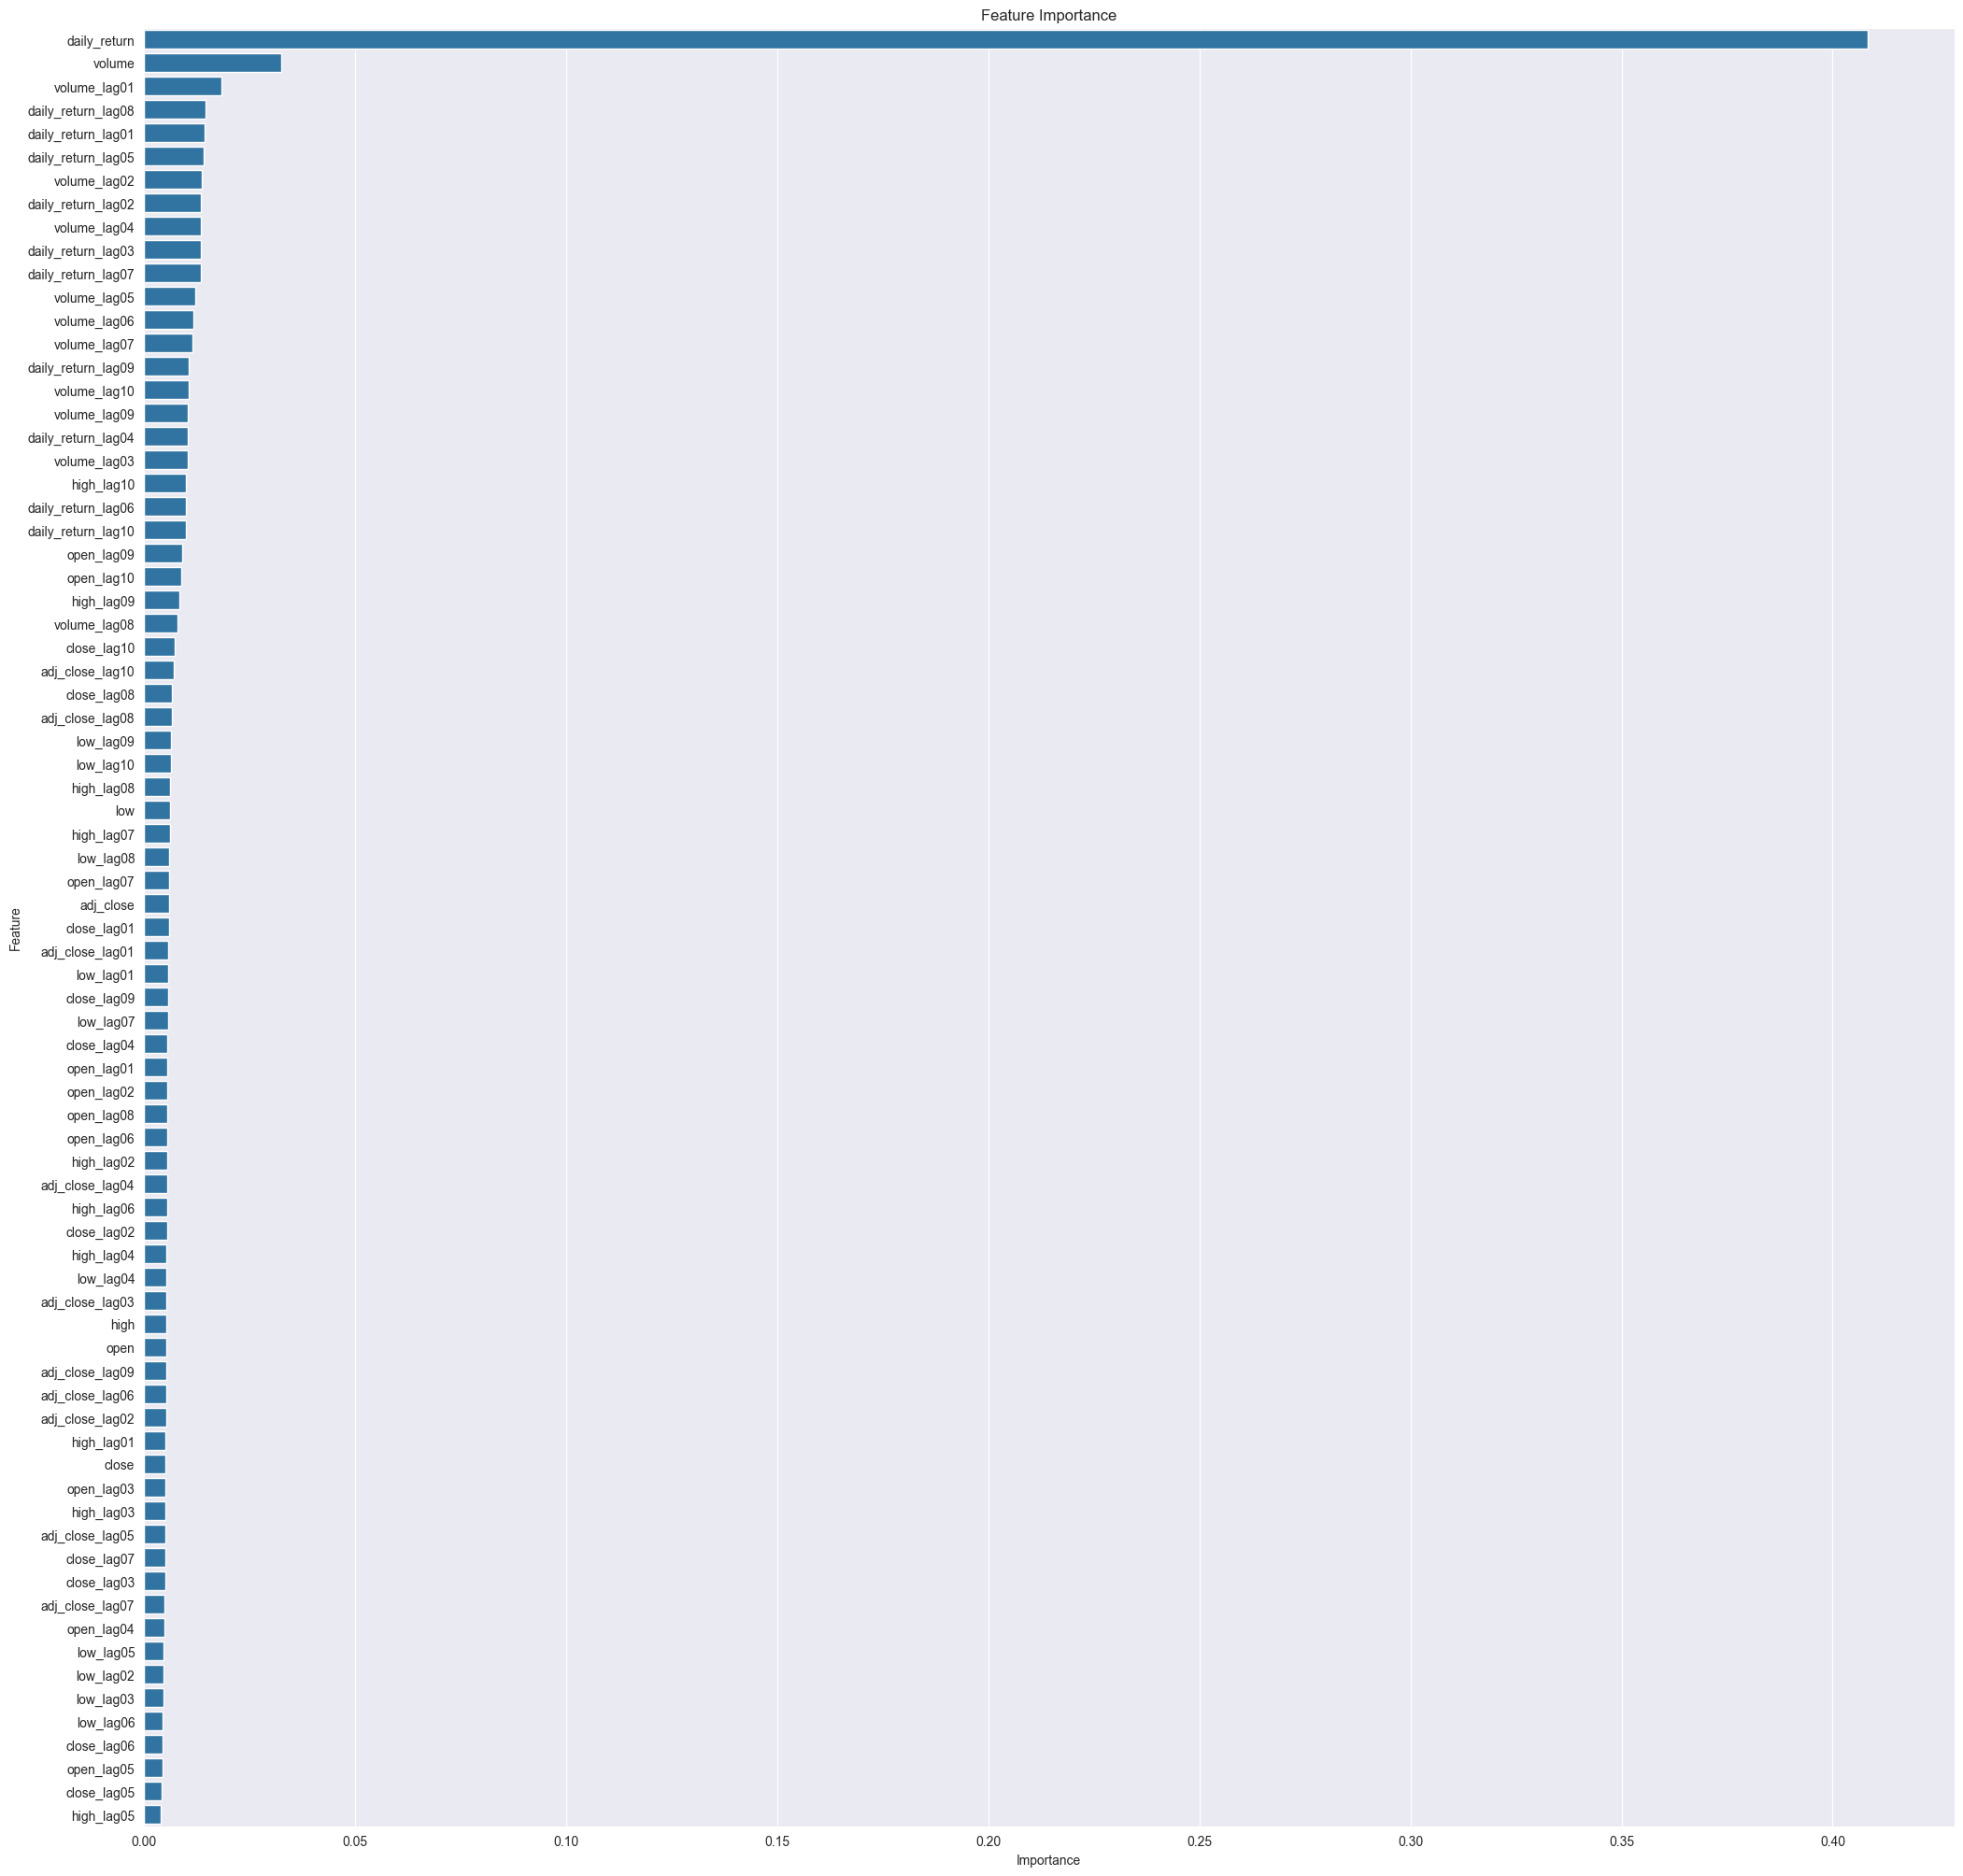

In [25]:
# Create a DataFrame for better visualization
feature_importances = best_rf.feature_importances_

feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
sns.barplot(x='Importance', y='Feature', data=feature_df, orient = 'h')
plt.title('Feature Importance')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

# Assuming you have a classifier `model` and data `X` and `y`
scores = cross_val_score(best_rf, X_test, y_test, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.42647059 0.63235294 0.88235294 0.8358209  0.82089552]
Mean CV accuracy: 0.7195785776997365


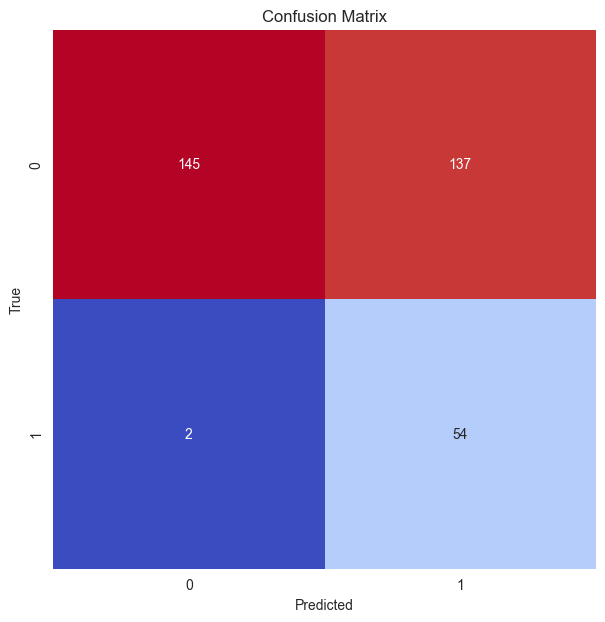

In [27]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

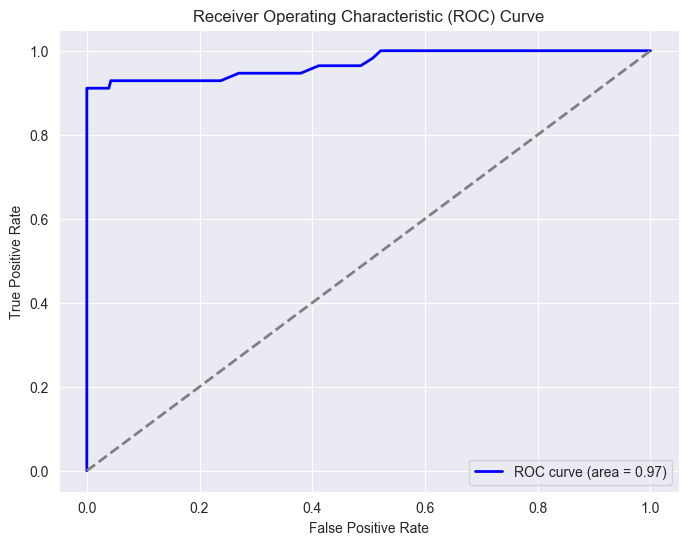

In [28]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


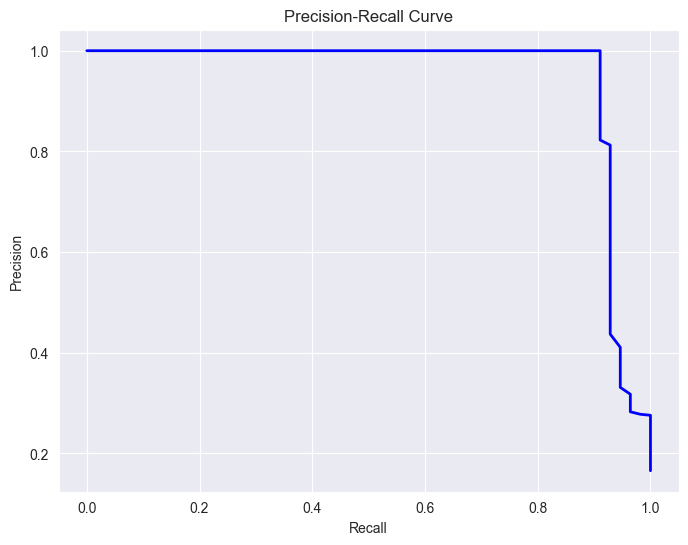

In [29]:
from sklearn.metrics import precision_recall_curve

# Get the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


<Figure size 2500x5000 with 0 Axes>

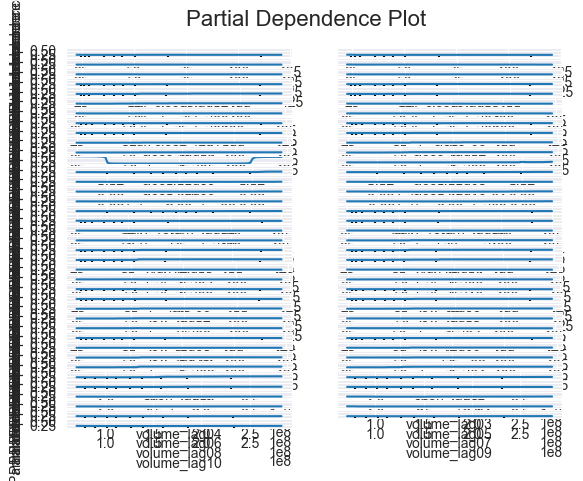

In [30]:
if 0:#takes a looong time
    from sklearn.inspection import PartialDependenceDisplay
    import matplotlib.pyplot as plt
    
    # Set the desired figure size (width, height)
    plt.figure(figsize=(25, 50))  # Adjust width and height as needed
    
    # Generate the partial dependence plot for the first two features
    display = PartialDependenceDisplay.from_estimator(
        best_rf,  # Your trained RandomForest model
        X_train,  # Training data
        #features = [0,1,2,3,4,5],  # List of feature indices or names for which to plot PDP
        features = np.arange(0,len(X_train.columns.to_list())).tolist(),
        feature_names = X_train.columns,  # Feature names for labeling
        n_cols = 2
    
    )
    
    # Adjust title and layout if necessary
    plt.suptitle('Partial Dependence Plot', fontsize=16)  # Title with bigger font size
    plt.subplots_adjust(top=0.9)  # Adjust the title position to avoid overlap
    plt.show()


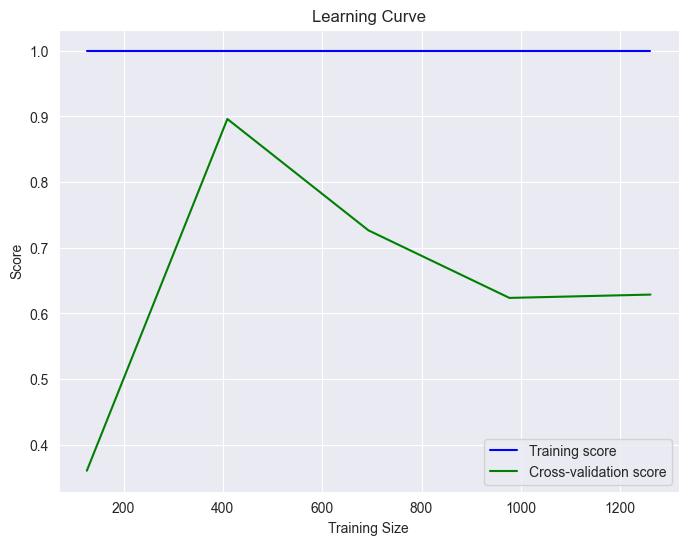

In [32]:
from sklearn.model_selection import learning_curve
#A learning curve helps you understand how the model performance changes with varying amounts of training data.
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation for train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()